In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import matplotlib as mpl
from weightedcorr import WeightedCorr
import pandas as pd


In [2]:
x, y = np.triu_indices(2000, k=0)
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
x_part += 880
y_part += 880
x_mini, y_mini = np.triu_indices(240, k=0)

C4_scale_all = np.empty((5,2000))
C4_weight_mat_all = np.empty((5,2000,2000))
C8_scale_all = np.empty((5,2000))
C8_weight_mat_all = np.empty((5,2000,2000))
C12_scale_all = np.empty((5,2000))
C12_weight_mat_all = np.empty((5,2000,2000))
rep_no = 5

for i in tnrange(5):
    C4_raw_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/global/glm_s1_h2_output_set"+str(i+1)+".npz")["E_scale"]
    C4_scale_all[i] = C4_raw_scale
    C8_raw_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/global/glm_s1_h2_output_set"+str(i+1)+".npz")["E_scale"]
    C8_scale_all[i] = C8_raw_scale
    C12_raw_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/global/glm_s1_h2_output_set"+str(i+1)+".npz")["E_scale"]
    C12_scale_all[i] = C12_raw_scale
    
    for j in range(2000):
        for k in range(2000):
            C4_weight_mat_all[i,j,k] = np.abs(C4_raw_scale[j] - C4_raw_scale[k])
            C8_weight_mat_all[i,j,k] = np.abs(C8_raw_scale[j] - C8_raw_scale[k])
            C12_weight_mat_all[i,j,k] = np.abs(C12_raw_scale[j] - C12_raw_scale[k])


/tmp/ipykernel_1430/3683221049.py:16: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(5):


  0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
C4_clust_idx = np.zeros((2000))
C8_clust_idx = np.zeros((2000))
C12_clust_idx = np.zeros((2000))

for i in range(4):
    C4_clust_idx[880+60*i:880+60*(i+1)] = i+1
for i in range(8):
    C8_clust_idx[880+30*i:880+30*(i+1)] = i+1
for i in range(12):
    C12_clust_idx[880+20*i:880+20*(i+1)] = i+1
    
C4_clust = np.zeros((2000,2000))
C8_clust = np.zeros((2000,2000))
C12_clust = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_clust_idx[i] != C4_clust_idx[j]:
            C4_clust[i,j] = 1
            C4_clust[j,i] = 1
        if C8_clust_idx[i] != C8_clust_idx[j]:
            C8_clust[i,j] = 1
            C8_clust[j,i] = 1
        if C12_clust_idx[i] != C12_clust_idx[j]:
            C12_clust[i,j] = 1
            C12_clust[j,i] = 1

/tmp/ipykernel_1430/2949891472.py:16: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
            
C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
C4_dist = np.zeros((2000,2000))
C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
C8_dist = np.zeros((2000,2000))
C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]
C12_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])
        C8_dist[i,j] = np.abs(C8_dist_raw[i] - C8_dist_raw[j])
        C12_dist[i,j] = np.abs(C12_dist_raw[i] - C12_dist_raw[j])
        
C4_clust_vec = C4_clust[x_part,y_part]
C4_dist_vec = C4_dist[x_part,y_part]
C8_clust_vec = C8_clust[x_part,y_part]
C8_dist_vec = C8_dist[x_part,y_part]
C12_clust_vec = C12_clust[x_part,y_part]
C12_dist_vec = C12_dist[x_part,y_part]

C4_orthog_vec = C4_clust_vec - C4_dist_vec * np.dot(C4_clust_vec, C4_dist_vec) / np.dot(C4_dist_vec, C4_dist_vec)
C8_orthog_vec = C8_clust_vec - C8_dist_vec * np.dot(C8_clust_vec, C8_dist_vec) / np.dot(C8_dist_vec, C8_dist_vec)
C12_orthog_vec = C12_clust_vec - C12_dist_vec * np.dot(C12_clust_vec, C12_dist_vec) / np.dot(C12_dist_vec, C12_dist_vec)

C4_orthog = np.zeros((240,240))
C8_orthog = np.zeros((240,240))
C12_orthog = np.zeros((240,240))

C4_orthog[x_mini,y_mini] = C4_orthog_vec
C8_orthog[x_mini,y_mini] = C8_orthog_vec
C12_orthog[x_mini,y_mini] = C12_orthog_vec

/tmp/ipykernel_1430/361271219.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [5]:
corr_type = "pearson"

C4_scale_mat_all = np.matmul(C4_scale_all.reshape(rep_no,-1,1), C4_scale_all.reshape(rep_no,1,-1))
C8_scale_mat_all = np.matmul(C8_scale_all.reshape(rep_no,-1,1), C8_scale_all.reshape(rep_no,1,-1))
C12_scale_mat_all = np.matmul(C12_scale_all.reshape(rep_no,-1,1), C12_scale_all.reshape(rep_no,1,-1))
within_corrs = np.zeros((10, 3))
clust_corrs = np.zeros((5, 3))
dist_corrs = np.zeros((5, 3))

for i in tnrange(3):
    if i == 0:
        scale_mat_all = C4_scale_mat_all
        weight_mat_all = C4_weight_mat_all
        dist_mat = C4_dist
        clust_mat = C4_orthog
    elif i == 1:
        scale_mat_all = C8_scale_mat_all
        weight_mat_all = C8_weight_mat_all
        dist_mat = C8_dist
        clust_mat = C8_orthog
    elif i == 2:
        scale_mat_all = C12_scale_mat_all
        weight_mat_all = C12_weight_mat_all
        dist_mat = C12_dist
        clust_mat = C12_orthog
        
    within_count = 0
    for j in range(rep_no):
        for k in range(j+1,rep_no,1):
            weight = scale_mat_all[j][x,y] * scale_mat_all[k][x,y]
            within_weight_corr_val = WeightedCorr(x=pd.Series(weight_mat_all[j][x,y]),
                                   y=pd.Series(weight_mat_all[k][x,y]),
                                   w=pd.Series(weight))(method=corr_type)
            within_corrs[within_count,i] = within_weight_corr_val
            within_count += 1
            
        clust_weight_corr_val = WeightedCorr(x=pd.Series(clust_mat[x_mini,y_mini]),
                   y=pd.Series(weight_mat_all[j][x_part,y_part]),
                   w=pd.Series(scale_mat_all[j][x_part,y_part]))(method=corr_type)
        dist_weight_corr_val = WeightedCorr(x=pd.Series(dist_mat[x,y]),
                   y=pd.Series(weight_mat_all[j][x,y]),
                   w=pd.Series(weight))(method=corr_type)
        clust_corrs[j,i] = clust_weight_corr_val
        dist_corrs[j,i] = dist_weight_corr_val

/tmp/ipykernel_1430/1922950632.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(3):


  0%|          | 0/3 [00:00<?, ?it/s]

/tmp/ipykernel_1430/2640639388.py:19: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

/tmp/ipykernel_1430/2640639388.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


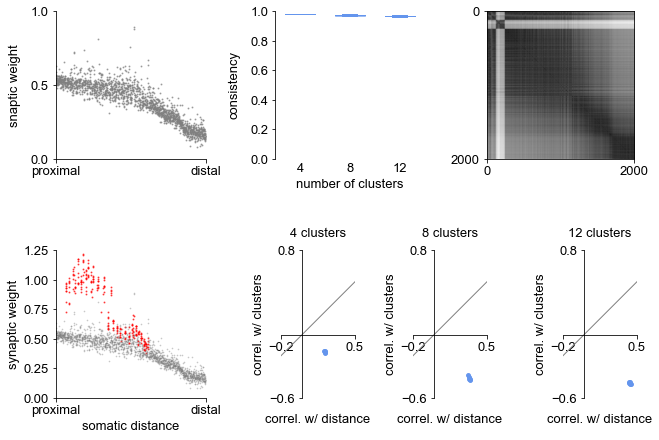

In [18]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (9,6))
gs = fig.add_gridspec(2,9, wspace=0.1, hspace=0.175)
ax1 = fig.add_subplot(gs[0,:3])
ax2 = fig.add_subplot(gs[0,3:6])
ax3 = fig.add_subplot(gs[1,:3])
ax41 = fig.add_subplot(gs[1,3:5])
ax42 = fig.add_subplot(gs[1,5:7])
ax43 = fig.add_subplot(gs[1,7:9])
ax5 = fig.add_subplot(gs[0,6:9])

color4_nona = ["#004cff", "#bbff00", "#ff0000", "#00eaff", "#1e0082"]
C4_dist_ord = np.argsort(C4_dist_raw[:2000])
color_idx = C4_dist_raw[:2000] / np.max(C4_dist_raw[:2000])
for i in tnrange(2000):
    plot_idx = C4_dist_ord[i]
    if (plot_idx < 880) or (plot_idx >= 1120):
        #C4_nona_color = color4_nona[C4_nona_idx[C4_dist_ord[i]]]
        ax1.scatter(i, C4_scale_all[0][C4_dist_ord][i], s=1, color="gray", alpha=0.6)
        ax3.scatter(i, C4_scale_all[0][C4_dist_ord][i], s=0.5, color="gray", alpha=0.35)
        
    elif (plot_idx >= 880) and (plot_idx < 1120):
        #C4_nona_color = color4_nona[C4_nona_idx[C4_dist_ord[i]]]
        ax3.scatter(i, C4_scale_all[0][C4_dist_ord][i], s=1, color="red", alpha=0.6)
        
bp = ax2.boxplot(within_corrs, widths=0.6, patch_artist=True)
for i in range(3):
    plt.setp(bp['boxes'][i], facecolor="cornflowerblue")
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor="cornflowerblue")
    plt.setp(bp["boxes"][i], color="cornflowerblue")
    plt.setp(bp["medians"][i], color="cornflowerblue")
for i in range(6):
    plt.setp(bp['whiskers'][i], color="cornflowerblue")
    plt.setp(bp['caps'][i], color="cornflowerblue")

ax_list = [ax41,ax42,ax43]
for i in range(len(ax_list)):
    ax = ax_list[i]
    #box = ax.get_position()
    #box.x0 = box.x0 - 0.082
    #ax.set_position(box) 
    ax.scatter(dist_corrs[:,i], clust_corrs[:,i], s=15, color="cornflowerblue")
    ax.errorbar(np.mean(dist_corrs[:,i]), np.mean(clust_corrs[:,i]),
                xerr = np.std(dist_corrs[:,i]),
                yerr = np.std(clust_corrs[:,i]),
                color = "cornflowerblue")
    ax.plot(np.linspace(-1,1,20), np.linspace(-1,1,20), color="gray", linewidth=1)
    ax.set_xlim(-0.2,0.5)
    ax.set_ylim(-0.6,0.8)
    ax.set_xticks([-0.2,0.5])
    ax.set_yticks([-0.6,0.8])
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xlabel("correl. w/ distance", labelpad=60)
    ax.set_ylabel("correl. w/ clusters")
    ax.set_aspect(1)

ax41.set_title("4 clusters", fontsize=13, y=1.05)
ax42.set_title("8 clusters", fontsize=13, y=1.05)
ax43.set_title("12 clusters", fontsize=13, y=1.05)

bg_idx = np.delete(np.arange(2000), np.arange(880,1120))
dist_bg = C4_dist_raw[bg_idx]
bg_plot_idx = bg_idx[np.argsort(dist_bg)]
plot_idx = np.empty((2000))
plot_idx[:240] = np.arange(880,1120)
plot_idx[240:] = bg_plot_idx
plot_idx = plot_idx.astype(int)

dist_mat_plot = np.mean(C4_weight_mat_all, 0)[plot_idx]
dist_mat_plot = dist_mat_plot[:,plot_idx]
dist_mat_plot /= np.max(dist_mat_plot)
dist_mat_plot = np.sqrt(dist_mat_plot)
ax5.imshow(dist_mat_plot, cmap="gray")
ax5.set_xticks([0,2000])
ax5.set_yticks([0,2000])

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_xlim(0,2000)
ax1.set_xticks([0,2000])
ax1.set_xticklabels(["proximal", "distal"])
ax1.set_ylabel("snaptic weight", labelpad=10)
ax1.set_ylim(0,1)
ax1.set_yticks([0,0.5,1])

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.set_xticklabels(["4", "8", "12"])
ax2.set_xlabel("number of clusters")
ax2.set_ylabel("consistency", labelpad = 10)
ax2.tick_params(axis="x", length=0)
ax2.set_ylim(0,1)


ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.set_xlim(0,2000)
ax3.set_xticks([0,2000])
ax3.set_xticklabels(["proximal", "distal"])
ax3.set_ylabel("synaptic weight")
ax3.set_xlabel("somatic distance")
ax3.set_ylim(0,1.25)
ax3.set_yticks([0,0.25,0.5,0.75,1,1.25])

fig.tight_layout()
#plt.show()
fig.savefig("/home/sklee/dendrite/fig_syn_weights/fig_syn_weights_raw.pdf", bbox_inches="tight", transparent=True)